In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.datasets import make_classification
import joblib
import pickle
import seaborn as sns

In [9]:
# Step 1: Training the Model
# Load the labeled data
labeled_data = pd.read_csv('../Data/training_dataset.csv', delimiter=",")

# Split the data into features (X) and target variable (y)
X = labeled_data.drop('Label', axis=1)
y = labeled_data['Label']

# X, y = make_classification(n_samples=7096, n_features=5, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the model (optional)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9550641940085592
Confusion Matrix:
 [[178   1   0  14   1   0]
 [  0 216   0   3   6   0]
 [  0   0 267   0   0   0]
 [  4   1   1 254   3   2]
 [  1   4   0  18 195   0]
 [  0   0   0   4   0 229]]


Model trained and saved as finger_bent_model.pkl


/Users/windyinmay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


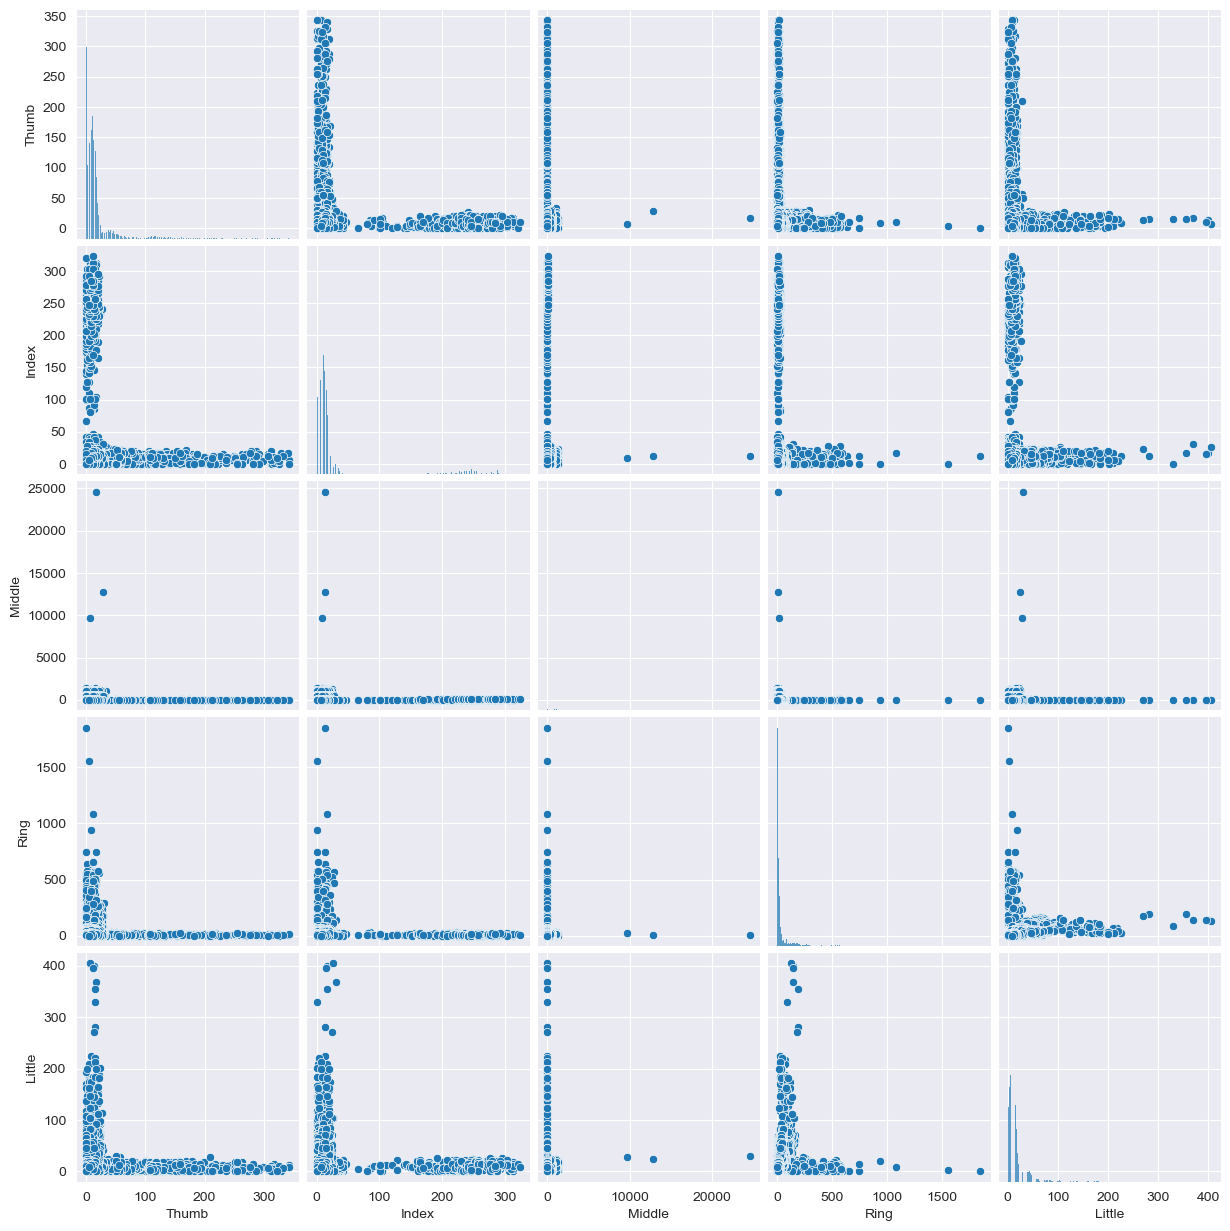

In [10]:
# Save the trained model for later use
model_filename = 'finger_bent_model.pkl'
joblib.dump(clf, model_filename)

print(f"Model trained and saved as {model_filename}")

with open('finger_bent_model.pkl', 'rb') as f:
    model_loaded_1= pickle.load(f)

sns.set_style('darkgrid')
sns.pairplot(X)